In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("social_network_ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
print(data.describe()) 
print("-"*70)
print(data.isnull().sum()) 

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000
----------------------------------------------------------------------
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [14]:
x = pd.get_dummies(data.drop(columns=['Purchased']), drop_first=True)
y = data['Purchased']


In [15]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

In [16]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(random_state=0, solver='lbfgs') 
lr.fit(x_train, y_train) 
pred = lr.predict(x_test) 

In [23]:
print("Test Data:\n", x_test[:10]) 
print("-"*40) 
print("Predicted Labels: ", pred[:10]) 
print("-"*40) 
print("Actual Labels:\n", y_test[:10])

Test Data:
       User ID  Age  EstimatedSalary  Gender_Male
209  15697424   46            22000        False
280  15609669   59            88000        False
33   15776733   28            44000        False
210  15724536   48            96000        False
93   15699284   29            28000        False
84   15798659   30            62000        False
329  15639576   47           107000        False
94   15786993   29            83000        False
266  15721592   40            75000         True
126  15610801   42            65000         True
----------------------------------------
Predicted Labels:  [0 0 0 0 0 0 1 0 0 0]
----------------------------------------
Actual Labels:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score 
cm = confusion_matrix(y_test, pred, labels=lr.classes_) 
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[60  3]
 [22 15]]


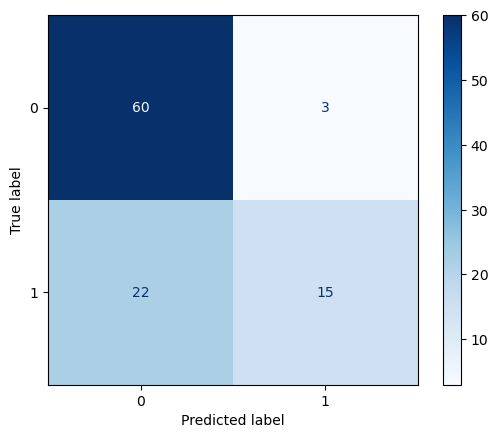

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 
display_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_) 
display_matrix.plot(cmap=plt.cm.Blues) 
plt.show() 

In [34]:
accuracy = accuracy_score(y_test,pred)
error_rate = 1 - accuracy
recall = recall_score(y_test, pred)
precision = precision_score(y_test, pred)
print("Accuracy: ",accuracy,"\nAccuracy(%): ",accuracy*100)
print("Error Rate: ",error_rate,"\nError Rate(%): ",error_rate*100)
print("Recall: ",recall,"\nRecall(%): ",recall*100)
print("Precision: ",precision,"\nPrecision(%): ",precision*100)

Accuracy:  0.75 
Accuracy(%):  75.0
Error Rate:  0.25 
Error Rate(%):  25.0
Recall:  0.40540540540540543 
Recall(%):  40.54054054054054
Precision:  0.8333333333333334 
Precision(%):  83.33333333333334


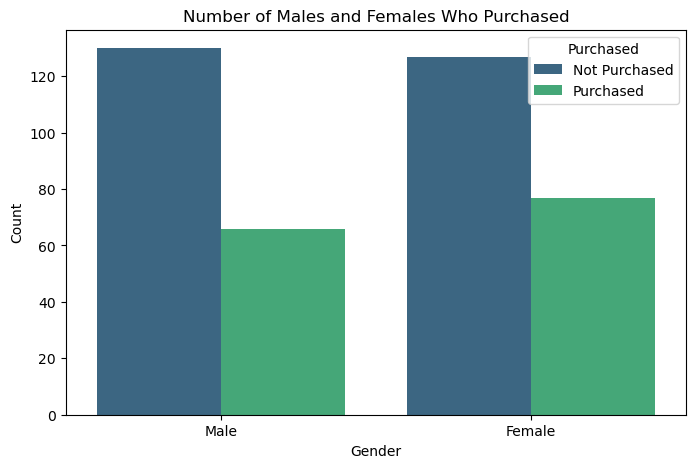

In [40]:
plt.figure(figsize=(8, 5)) 
sns.countplot(x='Gender', hue='Purchased', data=data, palette='viridis') 
plt.xlabel('Gender') 
plt.ylabel('Count') 
plt.title('Number of Males and Females Who Purchased') 
plt.legend(title='Purchased', labels=['Not Purchased', 'Purchased']) 
plt.show()